PRELIMINARY STEP: import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings in order to get rid of them

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Reading the dataset thanks to the built-in function in pandas.

In [ ]:
ds = pd.read_csv("./credit_prediction.csv")  #open and read the file using pandas

In [ ]:
ds.head(10) #show the first 10 elements

,id,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,26.822620,265.0,No,80.415295,NaN,312.494089,Good
1,1,23.0,Scientist,NaN,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,NaN,266.0,No,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,28.609352,267.0,No,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,3,23.0,Scientist,19114.12,1824.843333,NaN,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,NaN,Good,809.98,31.377862,268.0,No,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,4,23.0,NaN,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,24.797347,269.0,No,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,27.262259,270.0,No,62.430172,High_spent_Medium_value_payments,340.479212,Good
6,6,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,NaN,271.0,No,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,7,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,23.933795,NaN,No,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,8,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,NaN,Credit-Builder Loan,...,2.0,Good,605.03,NaN,319.0,NaN,NaN,Low_spent_Small_value_payments,470.690627,Standard
9,9,28.0,Teacher,34847.84,3037.986667,NaN,4.0,6.0,1.0,Credit-Builder Loan,...,2.0,Good,605.03,38.550848,320.0,No,40.391238,High_spent_Large_value_payments,484.591214,Good


In [ ]:
ds.duplicated().sum() #let's see how many duplicates

0

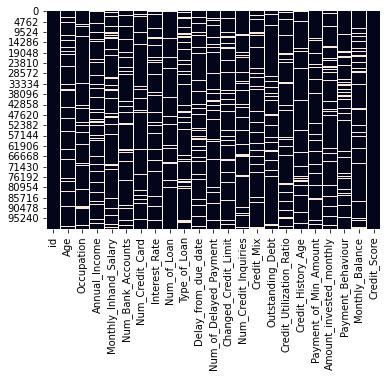

In [ ]:
sns.heatmap(ds.isna(), cbar = False) #to visualize null values for each column

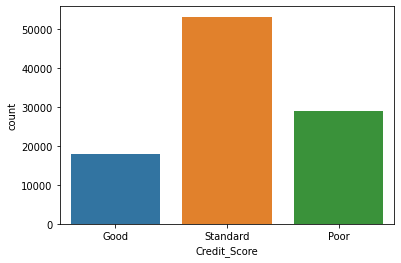

In [ ]:
sns.countplot(x = ds['Credit_Score']) #to visualize how many of them

In [ ]:
freq = ds.groupby(['Credit_Score']).count()
print(freq) #in order to calculate the baseline

                 id    Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
Credit_Score                                                                   
Good          17828  16097       16013          16025                  15924   
Poor          28998  26169       26044          26056                  26145   
Standard      53174  47847       47897          47730                  47812   

              Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
Credit_Score                                                                   
Good                      16125            16075          16050        16052   
Poor                      26047            26103          26081        26138   
Standard                  47763            47953          47868        47840   

              Type_of_Loan  ...  Changed_Credit_Limit  Num_Credit_Inquiries  \
Credit_Score                ...                                               
Good                 16056  ...         

We need to transform categorical variables into numerical ones.

In [ ]:
from sklearn.preprocessing import LabelEncoder
ds['Credit_Mix'] = LabelEncoder().fit_transform(ds['Credit_Mix'])
ds['Payment_Behaviour'] = LabelEncoder().fit_transform(ds['Payment_Behaviour'])

In [ ]:
#we can eliminate a priori some columns, as we can consider them as not relevant 
ds = ds.drop(columns=['id','Occupation', 'Type_of_Loan', 'Credit_History_Age', 'Changed_Credit_Limit', 'Payment_of_Min_Amount'])
ds.corr() #to see correlations, but all categorical ones will be ignored, so change them

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
Age,1.000000,0.094214,0.092432,-0.192405,-0.147670,-0.218744,-0.215283,-0.175110,-0.186063,-0.251603,0.060897,-0.202975,0.023721,0.006597,-0.030798,-0.002635
Annual_Income,0.094214,1.000000,0.998155,-0.285732,-0.218083,-0.302391,-0.256766,-0.249761,-0.287701,-0.280632,0.078006,-0.269997,0.177065,0.055108,-0.265724,-0.004711
Monthly_Inhand_Salary,0.092432,0.998155,1.000000,-0.283303,-0.216476,-0.301315,-0.256375,-0.249382,-0.285382,-0.279105,0.077388,-0.269707,0.178518,0.053704,-0.266155,-0.004176
Num_Bank_Accounts,-0.192405,-0.285732,-0.283303,1.000000,0.442678,0.583227,0.472694,0.560583,0.601553,0.515379,-0.184559,0.506999,-0.070942,-0.015364,0.080292,0.005845
Num_Credit_Card,-0.147670,-0.218083,-0.216476,0.442678,1.000000,0.499178,0.417508,0.479751,0.424036,0.458086,-0.263867,0.491157,-0.055238,-0.010274,0.063975,0.004964
Interest_Rate,-0.218744,-0.302391,-0.301315,0.583227,0.499178,1.000000,0.560036,0.591529,0.571366,0.631691,-0.259463,0.628982,-0.077353,-0.018500,0.090950,0.004477
Num_of_Loan,-0.215283,-0.256766,-0.256375,0.472694,0.417508,0.560036,1.000000,0.503398,0.473959,0.564533,-0.351639,0.639486,-0.101013,-0.012386,0.077168,0.001958
Delay_from_due_date,-0.175110,-0.249761,-0.249382,0.560583,0.479751,0.591529,0.503398,1.000000,0.540332,0.539325,-0.326715,0.572768,-0.064390,-0.009811,0.077015,0.004988
Num_of_Delayed_Payment,-0.186063,-0.287701,-0.285382,0.601553,0.424036,0.571366,0.473959,0.540332,1.000000,0.499689,-0.195698,0.503561,-0.072964,-0.021178,0.084444,0.007799
Num_Credit_Inquiries,-0.251603,-0.280632,-0.279105,0.515379,0.458086,0.631691,0.564533,0.539325,0.499689,1.000000,-0.267859,0.597357,-0.079951,-0.017745,0.086762,-0.002554


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

pipeline=ColumnTransformer([('num',StandardScaler(),[0,1,2,3,4,5,6,7,8,9,11,12,13,15]),('cat',OneHotEncoder(),[10,14])])



ds.head()
#again
ds.corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
Age,1.000000,0.094214,0.092432,-0.192405,-0.147670,-0.218744,-0.215283,-0.175110,-0.186063,-0.251603,0.060897,-0.202975,0.023721,0.006597,-0.030798,-0.002635
Annual_Income,0.094214,1.000000,0.998155,-0.285732,-0.218083,-0.302391,-0.256766,-0.249761,-0.287701,-0.280632,0.078006,-0.269997,0.177065,0.055108,-0.265724,-0.004711
Monthly_Inhand_Salary,0.092432,0.998155,1.000000,-0.283303,-0.216476,-0.301315,-0.256375,-0.249382,-0.285382,-0.279105,0.077388,-0.269707,0.178518,0.053704,-0.266155,-0.004176
Num_Bank_Accounts,-0.192405,-0.285732,-0.283303,1.000000,0.442678,0.583227,0.472694,0.560583,0.601553,0.515379,-0.184559,0.506999,-0.070942,-0.015364,0.080292,0.005845
Num_Credit_Card,-0.147670,-0.218083,-0.216476,0.442678,1.000000,0.499178,0.417508,0.479751,0.424036,0.458086,-0.263867,0.491157,-0.055238,-0.010274,0.063975,0.004964
Interest_Rate,-0.218744,-0.302391,-0.301315,0.583227,0.499178,1.000000,0.560036,0.591529,0.571366,0.631691,-0.259463,0.628982,-0.077353,-0.018500,0.090950,0.004477
Num_of_Loan,-0.215283,-0.256766,-0.256375,0.472694,0.417508,0.560036,1.000000,0.503398,0.473959,0.564533,-0.351639,0.639486,-0.101013,-0.012386,0.077168,0.001958
Delay_from_due_date,-0.175110,-0.249761,-0.249382,0.560583,0.479751,0.591529,0.503398,1.000000,0.540332,0.539325,-0.326715,0.572768,-0.064390,-0.009811,0.077015,0.004988
Num_of_Delayed_Payment,-0.186063,-0.287701,-0.285382,0.601553,0.424036,0.571366,0.473959,0.540332,1.000000,0.499689,-0.195698,0.503561,-0.072964,-0.021178,0.084444,0.007799
Num_Credit_Inquiries,-0.251603,-0.280632,-0.279105,0.515379,0.458086,0.631691,0.564533,0.539325,0.499689,1.000000,-0.267859,0.597357,-0.079951,-0.017745,0.086762,-0.002554


In [ ]:
#pre-process

#replace missing values with the mode if they are categorical variables and th mean for the numerical ones

for i in ds.columns[:-1]:
    
    if i == 'Credit_Mix' or i == 'Payment_Behaviour':
        ds[i].fillna(ds[i].mode(), inplace = True)
    else:
        ds[i].fillna(ds[i].mean(), inplace = True)
        
ds.isnull().sum() #check how many null values in ds now
ds.info() #contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  int64  
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Amount_invested_monthly   100000 non-null  fl

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  int64  
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Amount_invested_monthly   100000 non-null  fl

In [ ]:
description = ds.describe() #statistical summary
ds.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  int64  
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Amount_invested_monthly   100000 non-null  fl

In order to see the popularity of age

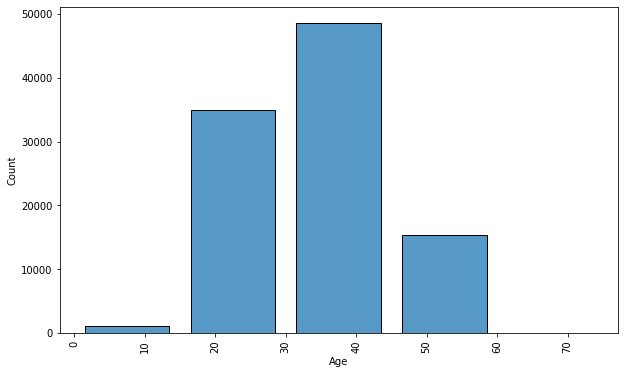

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(ds['Age'], bins=[0,15,30,45,60,75], shrink=.8)
plt.xticks(rotation=90);

Remove outliers

Outliers are points that are noticebly different from the others, this is why it is better to remove them.
We have decided to visualize them thanks to the boxplot, realized thanks to seaborn.

In [ ]:
from numpy import percentile

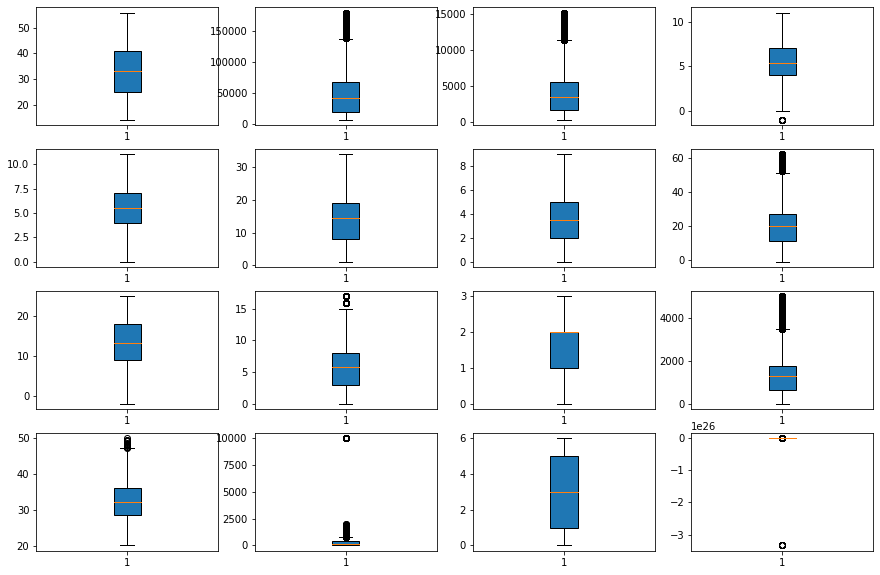

In [ ]:
fig, axs = plt.subplots(4,4)
fig.set_figwidth(15)
fig.set_figheight(10)

a = 0
b = 0 
for x in ds.columns:
  axs[b, a].boxplot(ds[x], patch_artist=True)
  if a == 3:
       a = 0
       b = b+1
  else:
      a = a+1
  if b == 4:
      break

Percentiles: 25th=25.000, 75th=41.000, IQR=16.000

The number of identified outliers for the variable Age is:
0
Percentiles: 25th=20347.965, 75th=67531.720, IQR=47183.755

The number of identified outliers for the variable Annual_Income is:
3138
Percentiles: 25th=1724.938, 75th=5582.571, IQR=3857.632

The number of identified outliers for the variable Monthly_Inhand_Salary is:
3371
Percentiles: 25th=4.000, 75th=7.000, IQR=3.000

The number of identified outliers for the variable Num_Bank_Accounts is:
19
Percentiles: 25th=4.000, 75th=7.000, IQR=3.000

The number of identified outliers for the variable Num_Credit_Card is:
0
Percentiles: 25th=8.000, 75th=19.000, IQR=11.000

The number of identified outliers for the variable Interest_Rate is:
0
Percentiles: 25th=2.000, 75th=5.000, IQR=3.000

The number of identified outliers for the variable Num_of_Loan is:
0
Percentiles: 25th=11.000, 75th=27.000, IQR=16.000

The number of identified outliers for the variable Delay_from_due_date is:
5755
P

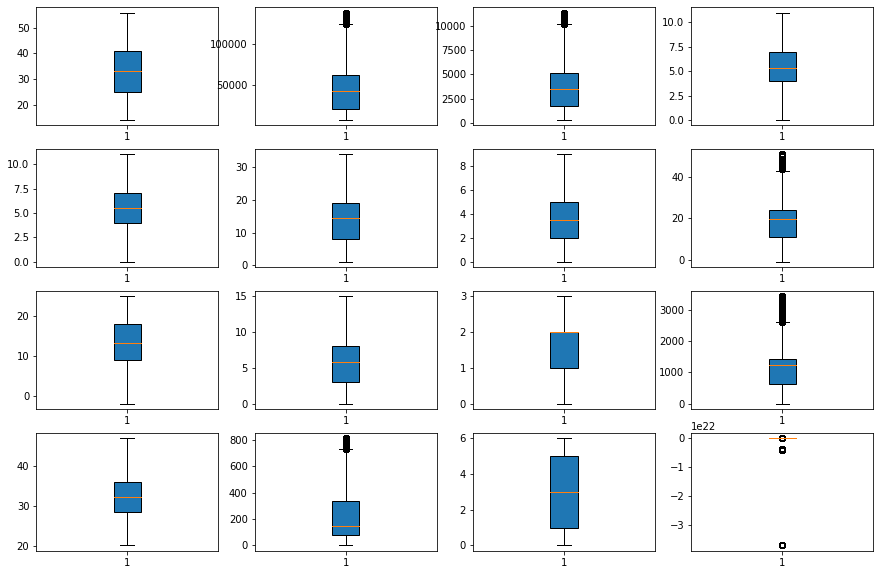

In [ ]:
fig, axs = plt.subplots(4,4)
fig.set_figwidth(15)
fig.set_figheight(10)

a = 0
b = 0 
for x in ds.columns:
    #a = sns.boxplot(ds[x])
    q25, q75 = percentile(ds[x], 25), percentile(ds[x], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = [j for j in ds[x] if j < lower or j > upper]
    print('\nThe number of identified outliers for the variable', x ,'is:\n' '%d' % len(outliers))

    if len(outliers) != 0:
        for i in outliers:
            ds[x] = ds[x].replace(i,ds[x].mean())
# using the variable axs for multiple Axes
    axs[b, a].boxplot(ds[x], patch_artist=True)
    if a == 3:
        a = 0
        b = b+1
    else:
        a = a+1
    if b == 4:
        break

After having looked at our dataset and having cleaned it, we can now start collecting data into array of dependent (what we want to predict) and independent variables  

In [ ]:
#collect data into arrays
X = ds.iloc[:, :-1].values      #independent variable
y = ds.iloc[:, -1].values       #dependent variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#encode data. This step is really important, we have already transformed the categorical data into integers. REMEMBER, NEVER TRAIN ON THE TEST SET!!

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

We can now decide three models that can help us solving this problem. 

In [ ]:
from sklearn.svm import SVC 
from sklearn import neighbors
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score

Kernel SVC classifier

{'C': 0.1, 'kernel': 'rbf', 'max_iter': 5000}
              precision    recall  f1-score   support

        Good       0.39      0.08      0.13      4428
        Poor       0.58      0.31      0.40      7277
    Standard       0.57      0.87      0.69     13295

    accuracy                           0.56     25000
   macro avg       0.51      0.42      0.41     25000
weighted avg       0.54      0.56      0.51     25000



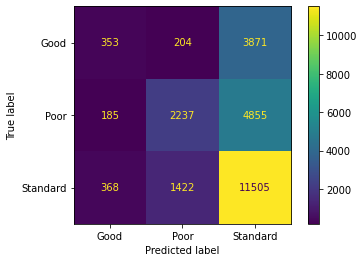

In [ ]:
param_grid = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.1,1, 10], 'max_iter':[5000]}
classifier = SVC()

clf_svc = GridSearchCV(classifier, param_grid)

clf_svc.fit(X_train,y_train)
print(clf_svc.best_params_)
y_pred_svc = clf_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))


_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc)

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 0.01, stop = X_set[:, 0].max() + 0.01, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 0.01, stop = X_set[:, 1].max() + 0.01, step = 0.01))

plt.contourf(X1, X2, clf_svc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title(f'SVC Test set')
plt.legend()
plt.show()

ValueError: ignored

XGBOOST Classifier

In [ ]:
#size = 10
param_grid = {'max_depth':[8, 11, 15],
              #'lambda': np.random.uniform(1e-3,10,size).tolist(),
              #'alpha': np.random.uniform(1e-3,10,size).tolist(),
              #'colsample_bytree': np.random.uniform(0.3,1,size).tolist(),
              'learning_rate':[0.1, 0.001], #loguniform distribution
              #'min_child_weight':np.random.randint(1,300,size).tolist()
              }
cls = XGBClassifier()
clf = GridSearchCV(cls, param_grid)
#print(clf.best_params_)

clf_xgb = clf.fit(X_train,y_train)

print(clf_xgb.best_params_)
y_pred_xgb = clf_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, clf_xgb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title(f'XGBoost Test set')
plt.legend()
plt.show()

KNN Classifier

In [ ]:
k_range = list(range(9, 15))

param_grid = {'n_neighbors':k_range, 'weights':['uniform', 'distance'], 'metric' : ['manhattan', 'l2', 'l1', 'euclidean', 'cosine']}
knn = neighbors.KNeighborsClassifier()
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)

# fitting the model for grid search

grid_search=grid.fit(X_train, y_train)
print(grid_search.best_params_)
y_pred_knn = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_knn))

_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)

MLP Classifier

In [ ]:
cls_mlp = MLPClassifier( 
    hidden_layer_sizes=(5,5,4)    
    )

param_grid_mlp = {'activation':['identity', 'logistic', 'tanh', 'relu'], 'learning_rate_init':(0.001, 0.005, 0.01)}

classifier = GridSearchCV(cls_mlp, param_grid_mlp)
clf_mlp = classifier.fit(X_train,y_train)
print(clf_mlp.best_params_)
y_pred_mlp = clf_mlp.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)